In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#connecting to database
import pyodbc 

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-MJC0RTJ;'
                      'Database=PaceSetters;'
                      'Trusted_Connection=yes;')

#cursor = conn.cursor()
#cursor.execute('SELECT * FROM car_loans')

#converting data to a dataframe
query = "SELECT * FROM car_loans"

loan_df = pd.read_sql(query, conn)

conn.close()

# Loading and cleaning data

In [3]:
#Feel of dataset 

loan_df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,417428,55013,64080,88.169998,18,14234,86,2699,1965-10-05,Self employed,...,0,0,5571,0,1,0,0yrs 9mon,1yrs 0mon,0,0
1,417429,72567,88919,83.779999,13,18486,86,4608,1979-02-05,Salaried,...,0,0,160963,0,0,1,3yrs 0mon,3yrs 6mon,0,0
2,417430,49049,64217,77.389999,34,15196,86,1050,1982-03-10,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,417431,53503,76245,72.139999,10,22842,86,5708,1987-01-01,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,417432,55559,65524,85.919998,67,21308,86,1446,1990-06-02,Self employed,...,0,0,15028,0,3,2,1yrs 3mon,2yrs 11mon,0,0


In [4]:
#Number of rows and columns

loan_df.shape

(233154, 41)

In [5]:
#Getting data types and feel of null columns

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [6]:
#To know the period loan covers, convert Disbursal date to datetime
import datetime
import warnings
warnings.filterwarnings('ignore')
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

In [7]:
#Print Max and Min date to know period disbursal covers

print("Maximum Disbursal Date: ", loan_df['DISBURSAL_DATE'].max())
print("Minium Disbursal Date: ", loan_df['DISBURSAL_DATE'].min())

Maximum Disbursal Date:  2018-10-31 00:00:00
Minium Disbursal Date:  2018-08-01 00:00:00


In [8]:
#Inspecting Loan_default column

loan_df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [9]:
#Checking percentage

loan_df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

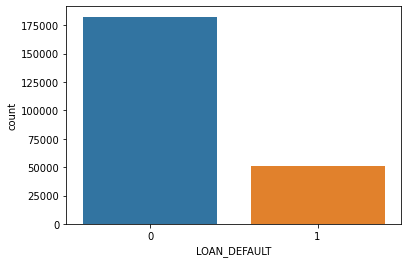

In [10]:
#Visualizing same column

sns.countplot(x="LOAN_DEFAULT", data=loan_df)
plt.show()

In [11]:
#Checking if any column contains null rows

#Found only Employment Type contains null rows

loan_df.isnull().any()

UNIQUEID                               False
DISBURSED_AMOUNT                       False
ASSET_COST                             False
LTV                                    False
BRANCH_ID                              False
SUPPLIER_ID                            False
MANUFACTURER_ID                        False
CURRENT_PINCODE_ID                     False
DATE_OF_BIRTH                          False
EMPLOYMENT_TYPE                         True
DISBURSAL_DATE                         False
STATE_ID                               False
EMPLOYEE_CODE_ID                       False
MOBILENO_AVL_FLAG                      False
AADHAR_FLAG                            False
PAN_FLAG                               False
VOTERID_FLAG                           False
DRIVING_FLAG                           False
PASSPORT_FLAG                          False
PERFORM_CNS_SCORE                      False
PERFORM_CNS_SCORE_DESCRIPTION          False
PRI_NO_OF_ACCTS                        False
PRI_ACTIVE

In [12]:
#Checking number of null rows in column

loan_df.isnull().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64


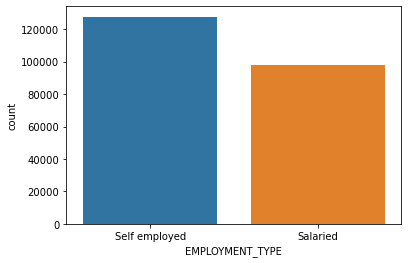

In [13]:
#Exploring and visualizing content of EMPLOYMENT_TYPE

print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

In [14]:
#Filing null rows with "Missing"

loan_df = loan_df.fillna(value={'EMPLOYMENT_TYPE' : 'Missing'})

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64


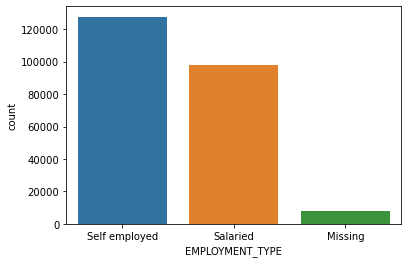

In [15]:
#Visualizing column after filling null

print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

In [16]:
#Handling missing values from SEC_CURRENT_BALANCE
loan_df['SEC_CURRENT_BALANCE'] = loan_df['SEC_CURRENT_BALANCE'].fillna(0)

In [17]:
#Inspecting 'DISBURSAL_DATE', 'DATE_OF_BIRTH'

loan_df[['DISBURSAL_DATE', 'DATE_OF_BIRTH']].sample(10)

,DISBURSAL_DATE,DATE_OF_BIRTH
185526,2018-10-23,1989-11-23
49360,2018-08-28,1992-02-26
205080,2018-10-26,1981-01-01
79293,2018-09-10,1996-12-03
11357,2018-08-09,1970-05-17
42803,2018-08-24,1984-09-05
70520,2018-09-04,1982-01-01
138816,2018-10-05,1997-01-01
181024,2018-10-22,1988-10-18
8426,2018-08-07,1968-08-28


In [18]:
#Converting 'DISBURSAL_DATE', 'DATE_OF_BIRTH' to datetime type format and calculating ages of customers as at date 
#of disbursement

loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

#calculate their age at time of disbursal
loan_df['AGE'] = loan_df['DISBURSAL_DATE'] - loan_df['DATE_OF_BIRTH']
loan_df['AGE'] = loan_df['AGE'] // np.timedelta64(1, 'Y')

#Inspect the results
print(loan_df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(n=5))

       DATE_OF_BIRTH  AGE DISBURSAL_DATE
14390     1983-01-01   35     2018-08-11
190017    1976-10-21   42     2018-10-24
55472     1963-03-01   55     2018-08-29
96619     1987-11-06   30     2018-09-18
28223     1972-01-01   46     2018-08-18


In [19]:
#Extracting date from 'DISBURSAL_DATE' to see if there is a trend with months in terms of default, days may be too
#dispersed and may not give meaningful insight

loan_df['DISBURSAL_MONTH'] = loan_df['DISBURSAL_DATE'].dt.month
loan_df['DISBURSAL_MONTH'].value_counts()

10    98364
8     68002
9     66788
Name: DISBURSAL_MONTH, dtype: int64

In [20]:
#Drop 'DISBURSAL_DATE', 'DATE_OF_BIRTH' since we have age and disbursal month column

loan_df = loan_df.drop(['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis=1)

In [21]:
#Inspecting 'CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE' column

loan_df[['CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE']].sample(n=10)

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
2770,0yrs 0mon,0yrs 0mon
41641,2yrs 6mon,2yrs 6mon
90451,0yrs 0mon,0yrs 0mon
146698,5yrs 3mon,1yrs 5mon
32513,1yrs 7mon,0yrs 9mon
105534,0yrs 6mon,0yrs 4mon
26765,0yrs 0mon,0yrs 0mon
199766,2yrs 2mon,1yrs 2mon
56987,0yrs 0mon,0yrs 0mon
204839,0yrs 0mon,0yrs 0mon


In [22]:
#Create funtion to calculate month from extracted figures in 'CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE'

def calc_months(str_list):  
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

In [23]:
#Extracting numbers from text in 'CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE'

loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].str.findall('\d+')
print(loan_df['AVERAGE_ACCT_AGE_MONTHS'].sample(n=10))

193635    [0, 0]
105627    [0, 0]
79551     [1, 5]
167014    [0, 0]
144542    [2, 7]
69300     [0, 8]
4844      [3, 0]
136779    [0, 0]
57370     [1, 9]
42898     [0, 8]
Name: AVERAGE_ACCT_AGE_MONTHS, dtype: object


In [24]:
#Applying calc_month function on 'AVERAGE_ACCT_AGE_MONTHS'

loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE_MONTHS'].map(calc_months)

In [25]:
#Testing with 10 samples

print(loan_df[['AVERAGE_ACCT_AGE_MONTHS', 'AVERAGE_ACCT_AGE']].sample(n=10))

        AVERAGE_ACCT_AGE_MONTHS AVERAGE_ACCT_AGE
55803                         0        0yrs 0mon
12155                         0        0yrs 0mon
90850                         0        0yrs 0mon
200229                       68        5yrs 8mon
153390                        8        0yrs 8mon
150144                        4        0yrs 4mon
87040                         0        0yrs 0mon
90656                        18        1yrs 6mon
87822                        13        1yrs 1mon
84907                         7        0yrs 7mon


In [26]:
#Creating function to create new column, extract and calc months

def convert_str_to_months(col_name):
    new_col = col_name + '_MONTHS'
    loan_df[new_col] = loan_df[col_name].str.findall('\d+')
    loan_df[new_col] = loan_df[new_col].map(calc_months)


In [27]:
#Using convert_str_to_months on CREDIT_HISTORY_LENGTH

convert_str_to_months('CREDIT_HISTORY_LENGTH')
loan_df[['CREDIT_HISTORY_LENGTH_MONTHS', 'CREDIT_HISTORY_LENGTH']].sample(n=5)

,CREDIT_HISTORY_LENGTH_MONTHS,CREDIT_HISTORY_LENGTH
111324,12,1yrs 0mon
220077,0,0yrs 0mon
191011,0,0yrs 0mon
92579,45,3yrs 9mon
101227,0,0yrs 0mon


In [28]:
#Dropping 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH' since months are already extracted

loan_df = loan_df.drop(['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'], axis=1)

# Exploratory Data Analysis

In [29]:
#Checking unique values
#MOBILE_AVL_FLAG has only one unique value

loan_df.nunique()

UNIQUEID                               233154
DISBURSED_AMOUNT                        24565
ASSET_COST                              46252
LTV                                      6579
BRANCH_ID                                  82
SUPPLIER_ID                              2953
MANUFACTURER_ID                            11
CURRENT_PINCODE_ID                       6698
EMPLOYMENT_TYPE                             3
STATE_ID                                   22
EMPLOYEE_CODE_ID                         3270
MOBILENO_AVL_FLAG                           1
AADHAR_FLAG                                 2
PAN_FLAG                                    2
VOTERID_FLAG                                2
DRIVING_FLAG                                2
PASSPORT_FLAG                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                           108
PRI_ACTIVE_ACCTS                           40
PRI_OVERDUE_ACCTS                 

In [30]:
#Inspecting MOBILENO_AVL_FLAG

loan_df['MOBILENO_AVL_FLAG'].value_counts()

1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64

In [31]:
#A column with single record has no predictive value, so we drop
loan_df = loan_df.drop(['MOBILENO_AVL_FLAG'], axis = 1)

In [32]:
#Inspecting all columns with _ID

loan_df[['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID', 'STATE_ID', 'MANUFACTURER_ID']].sample(10)

,SUPPLIER_ID,CURRENT_PINCODE_ID,EMPLOYEE_CODE_ID,BRANCH_ID,STATE_ID,MANUFACTURER_ID
185854,16555,1863,2628,19,4,51
15749,21043,3617,2549,121,9,86
179413,16679,5360,279,42,3,51
172270,21013,7125,1674,104,10,86
113543,21911,1368,1008,61,6,86
180879,23341,2712,1077,18,4,45
112857,21305,40,712,3,1,86
38186,17224,2789,242,147,2,45
196594,22736,6398,2223,48,5,49
142943,18703,6215,1178,20,5,86


In [33]:
#they contain categorical, underordered information
#Id fields with large numbers of unique values will introduce complexity into our predictive model
#We decided to drop them from the dataset

loan_df = loan_df.drop(['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'], axis=1)

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


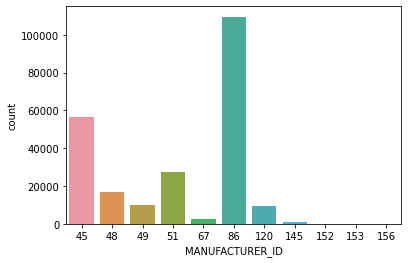

In [34]:
#Exploring the MANUFACTURER_ID column

print(loan_df['MANUFACTURER_ID'].value_counts())
print(loan_df['MANUFACTURER_ID'].value_counts(normalize=True))
sns.countplot(x="MANUFACTURER_ID", data=loan_df)
plt.show()

In [35]:
#Trying to see from which manufacturer we got the highest number of defaults 

print(loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts().unstack(level=-1))
print(loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))

LOAN_DEFAULT           0        1
MANUFACTURER_ID                  
45               43687.0  12939.0
48               12156.0   4554.0
49                7984.0   2236.0
51               21547.0   5657.0
67                1882.0    523.0
86               87124.0  22410.0
120               7526.0   2132.0
145                622.0    156.0
152                  6.0      NaN
153                  8.0      4.0
156                  1.0      NaN
LOAN_DEFAULT            0         1
MANUFACTURER_ID                    
45               0.771501  0.228499
48               0.727469  0.272531
49               0.781213  0.218787
51               0.792053  0.207947
67               0.782536  0.217464
86               0.795406  0.204594
120              0.779250  0.220750
145              0.799486  0.200514
152              1.000000       NaN
153              0.666667  0.333333
156              1.000000       NaN


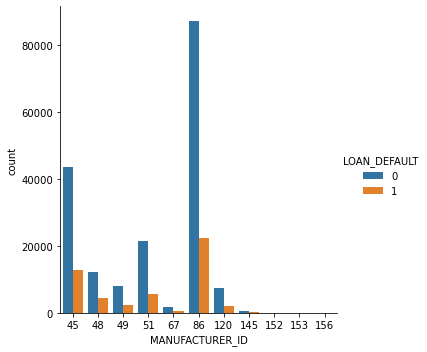

In [36]:
#Visualizing above output

sns.catplot(data=loan_df,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')
plt.show()

In [37]:
#We have other categorical features to inspect, so we created a function to avoid repeation, copying and pasting same code

def explore_categorical(col_name):  
    print("{0} Ratio".format(col_name))
    print(loan_df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    sns.catplot(data=loan_df,kind='count',x=col_name,hue='LOAN_DEFAULT')
    plt.show()

DISBURSAL_MONTH Ratio
10    0.421884
8     0.291661
9     0.286454
Name: DISBURSAL_MONTH, dtype: float64


DISBURSAL_MONTH Default Counts
LOAN_DEFAULT         0      1
DISBURSAL_MONTH              
8                53336  14666
9                53973  12815
10               75234  23130


DISBURSAL_MONTH Default Ratio
LOAN_DEFAULT            0         1
DISBURSAL_MONTH                    
8                0.784330  0.215670
9                0.808124  0.191876
10               0.764853  0.235147




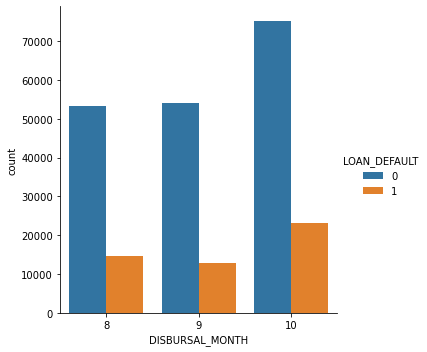

In [38]:
explore_categorical("DISBURSAL_MONTH")

In [39]:
#Exploring Continuous variables

loan_df["AGE"].describe()

count    233154.000000
mean         33.938504
std           9.818802
min          18.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64

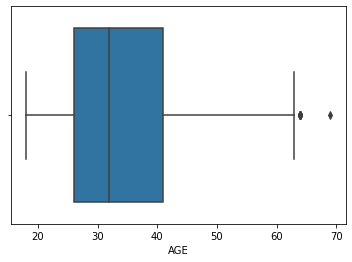

In [40]:
sns.boxplot(x="AGE", data=loan_df)
plt.show()

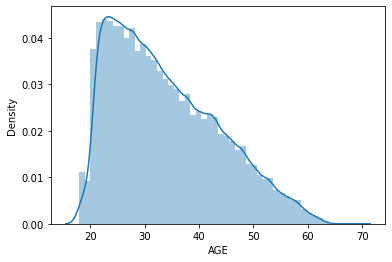

In [41]:
sns.distplot(loan_df['AGE'], hist=True)
plt.show()

In [42]:
#Checking age stat with Loan default

loan_df.groupby('LOAN_DEFAULT')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
LOAN_DEFAULT,,,,,,,,
0,182543.0,34.127307,9.850548,18.0,26.0,32.0,41.0,69.0
1,50611.0,33.257533,9.672964,18.0,25.0,31.0,40.0,64.0


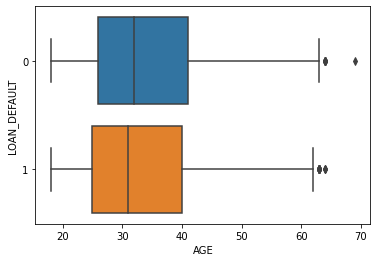

In [43]:
sns.boxplot(x='AGE', y='LOAN_DEFAULT', data=loan_df, orient="h")
plt.show()

In [44]:
#We have other continuous features to inspect, so we created a function to avoid repeation, copying and pasting same code

def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(loan_df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=loan_df)
    plt.show()

    #Look at the distribution
    sns.distplot(loan_df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(loan_df.groupby('LOAN_DEFAULT')[col_name].describe())

    #look at grouped boxplot 
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=loan_df, orient="h")
    plt.show()

DISBURSED_AMOUNT Summary


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




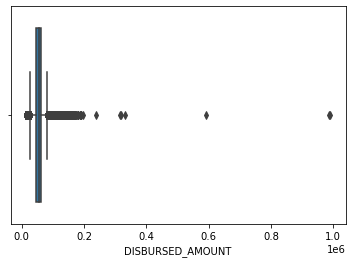

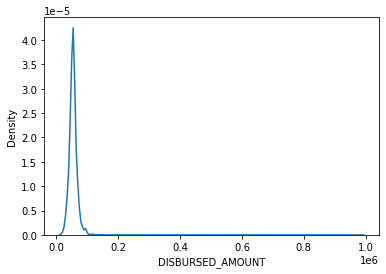

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


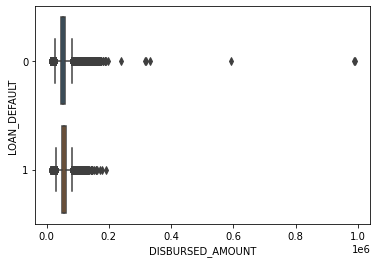

In [45]:
explore_continuous('DISBURSED_AMOUNT')

AADHAR_FLAG Ratio
True     0.84032
False    0.15968
Name: AADHAR_FLAG, dtype: float64


AADHAR_FLAG Default Counts
LOAN_DEFAULT       0      1
AADHAR_FLAG                
False          27684   9546
True          154859  41065


AADHAR_FLAG Default Ratio
LOAN_DEFAULT         0         1
AADHAR_FLAG                     
False         0.743594  0.256406
True          0.790403  0.209597




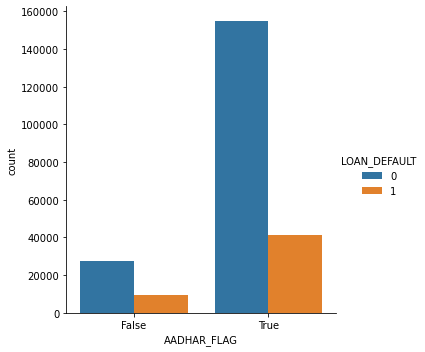

In [46]:
#Exploring AADHAR_FLAG

explore_categorical('AADHAR_FLAG')

# Feature Engineering

In [47]:
#Getting the index of the highest value in loan disbursement to see

loan_df['DISBURSED_AMOUNT'].idxmax()

22321

In [48]:
#Checking the column

loan_df.loc[loan_df['DISBURSED_AMOUNT'].idxmax()]

UNIQUEID                                                                          440173
DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                            61.389999
MANUFACTURER_ID                                                                      152
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
AADHAR_FLAG                                                                         True
PAN_FLAG                                                                            True
VOTERID_FLAG                                                                       False
DRIVING_FLAG                                                                       False
PASSPORT_FLAG        

In [49]:
#Since loan value is reasonable as per asset cost, we decided to bin data to smoothen out the effect of strange outliers
disbursed_buckets = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_labels = ['13k - 30k', '30k - 45k', '45k - 60k', '60k - 75k', '75k - 150k', '150k - 1m']
loan_df['DISBURSED_CAT'] = pd.cut(loan_df['DISBURSED_AMOUNT'], disbursed_buckets, labels=disbursed_labels)

DISBURSED_CAT Ratio
45k - 60k     0.544293
60k - 75k     0.213696
30k - 45k     0.174245
75k - 150k    0.046626
13k - 30k     0.020866
150k - 1m     0.000274
Name: DISBURSED_CAT, dtype: float64


DISBURSED_CAT Default Counts
LOAN_DEFAULT       0      1
DISBURSED_CAT              
13k - 30k       4207    658
30k - 45k      34323   6303
45k - 60k      98830  28074
60k - 75k      37056  12768
75k - 150k      8070   2801
150k - 1m         57      7


DISBURSED_CAT Default Ratio
LOAN_DEFAULT          0         1
DISBURSED_CAT                    
13k - 30k      0.864748  0.135252
30k - 45k      0.844853  0.155147
45k - 60k      0.778778  0.221222
60k - 75k      0.743738  0.256262
75k - 150k     0.742342  0.257658
150k - 1m      0.890625  0.109375




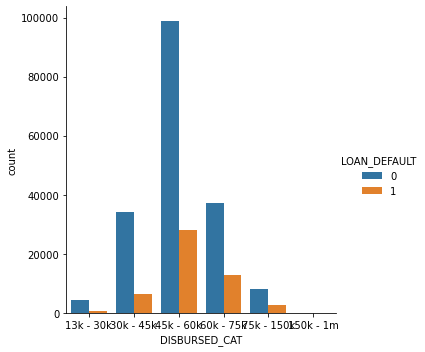

In [50]:
#Inspecting DISBURSED_CAT

explore_categorical('DISBURSED_CAT')

In [51]:
print(loan_df['AGE'].max())
print(loan_df['AGE'].min())

69
18


In [52]:
disbursed_buckets = [16, 25, 35, 45, 55, 70]
disbursed_labels = ['16 - 25', '25 - 35', '35 - 45', '45 - 55', '55 - 70']

In [53]:
loan_df['AGE_CAT'] = pd.cut(loan_df['AGE'], disbursed_buckets, labels=disbursed_labels)

In [54]:
#Checking the difference between asset cost and disbursement amount

loan_df['DISBURSAL_DIFFERENCE'] = loan_df['ASSET_COST'] - loan_df['DISBURSED_AMOUNT']

In [55]:
#Sanity check

loan_df[['DISBURSAL_DIFFERENCE', 'ASSET_COST', 'DISBURSED_AMOUNT']].sample(5)

,DISBURSAL_DIFFERENCE,ASSET_COST,DISBURSED_AMOUNT
136309,20144,70887,50743
198660,12385,58530,46145
109967,37082,53701,16619
33607,25926,61865,35939
202432,20351,66700,46349


In [56]:
#Adding Primary and Secondary column to reduce complexity and retain information.

loan_df['TOTAL_ACCTS'] = loan_df['PRI_NO_OF_ACCTS'] + loan_df['SEC_NO_OF_ACCTS']
loan_df['TOTAL_ACTIVE_ACCTS'] = loan_df['PRI_ACTIVE_ACCTS'] + loan_df['SEC_ACTIVE_ACCTS']
loan_df['TOTAL_OVERDUE_ACCTS'] = loan_df['PRI_OVERDUE_ACCTS'] + loan_df['SEC_OVERDUE_ACCTS']
loan_df['TOTAL_CURRENT_BALANCE'] = loan_df['PRI_CURRENT_BALANCE'] + loan_df['SEC_CURRENT_BALANCE']
loan_df['TOTAL_SANCTIONED_AMOUNT'] = loan_df['PRI_SANCTIONED_AMOUNT'] + loan_df['SEC_SANCTIONED_AMOUNT'] 
loan_df['TOTAL_DISBURSED_AMOUNT'] = loan_df['PRI_DISBURSED_AMOUNT'] + loan_df['SEC_DISBURSED_AMOUNT']
loan_df['TOTAL_INSTAL_AMT'] = loan_df['PRIMARY_INSTAL_AMT'] + loan_df['SEC_INSTAL_AMT']

In [57]:
#Sanity check

loan_df[['TOTAL_ACCTS', 'PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS']].sample(10)

,TOTAL_ACCTS,PRI_NO_OF_ACCTS,SEC_NO_OF_ACCTS
161422,0,0,0
67006,3,3,0
98235,0,0,0
213280,30,30,0
177752,21,21,0
121919,0,0,0
212661,0,0,0
168191,7,7,0
220515,0,0,0
220557,0,0,0


In [58]:
#Dropping previous columns

drop_cols = ['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 
             'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_NO_OF_ACCTS', 
             'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 
             'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']

loan_df = loan_df.drop(drop_cols, axis=1)

In [59]:
#Calculating prcentage of overdue loans

loan_df['OVERDUE_PCT'] = loan_df['TOTAL_OVERDUE_ACCTS'] / loan_df['TOTAL_ACCTS']

In [60]:
#Checking for null value in overdue loans column
loan_df['OVERDUE_PCT'].isnull().sum()

115792

In [61]:
#Filling null values with '0'

loan_df['OVERDUE_PCT'] = loan_df['OVERDUE_PCT'].fillna(0)

In [62]:
#Sanity check

loan_df['OVERDUE_PCT'].isnull().sum()

0

In [63]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   UNIQUEID                             233154 non-null  int64   
 1   DISBURSED_AMOUNT                     233154 non-null  int64   
 2   ASSET_COST                           233154 non-null  int64   
 3   LTV                                  233154 non-null  float64 
 4   MANUFACTURER_ID                      233154 non-null  int64   
 5   EMPLOYMENT_TYPE                      233154 non-null  object  
 6   STATE_ID                             233154 non-null  int64   
 7   AADHAR_FLAG                          233154 non-null  bool    
 8   PAN_FLAG                             233154 non-null  bool    
 9   VOTERID_FLAG                         233154 non-null  bool    
 10  DRIVING_FLAG                         233154 non-null  bool    
 11  

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
#Scaling numerical variables to have the same range on model

numeric_cols = ['DISBURSED_AMOUNT', 
                'ASSET_COST', 
                'LTV', 
                'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
                'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                'NO_OF_INQUIRIES', 
                'AGE', 
                'AVERAGE_ACCT_AGE_MONTHS', 
                'CREDIT_HISTORY_LENGTH_MONTHS',
                'PERFORM_CNS_SCORE',
                'TOTAL_ACCTS',
                'TOTAL_ACTIVE_ACCTS',
                'TOTAL_OVERDUE_ACCTS',
                'TOTAL_CURRENT_BALANCE', 
                'TOTAL_SANCTIONED_AMOUNT', 
                'TOTAL_DISBURSED_AMOUNT', 
                'TOTAL_INSTAL_AMT', 
                'OVERDUE_PCT', 
                'DISBURSAL_DIFFERENCE']

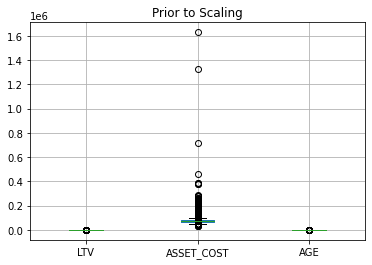

In [66]:
#Checking the scaling of 'LTV', 'ASSET_COST', 'AGE', it is evident that they are on different scaling

loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('Prior to Scaling')
plt.show()

In [67]:
#Applying MinMaxScaler

loan_df[numeric_cols] = MinMaxScaler().fit_transform(loan_df[numeric_cols])

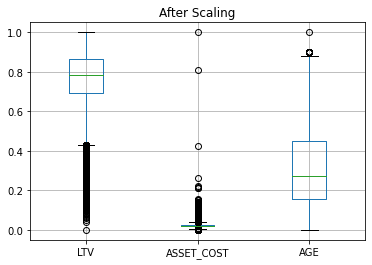

In [68]:
#Checking boxplot after MinMaxScaler

loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('After Scaling')
plt.show()

# Linear Classifiers

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score 
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

In [70]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   UNIQUEID                             233154 non-null  int64   
 1   DISBURSED_AMOUNT                     233154 non-null  float64 
 2   ASSET_COST                           233154 non-null  float64 
 3   LTV                                  233154 non-null  float64 
 4   MANUFACTURER_ID                      233154 non-null  int64   
 5   EMPLOYMENT_TYPE                      233154 non-null  object  
 6   STATE_ID                             233154 non-null  int64   
 7   AADHAR_FLAG                          233154 non-null  bool    
 8   PAN_FLAG                             233154 non-null  bool    
 9   VOTERID_FLAG                         233154 non-null  bool    
 10  DRIVING_FLAG                         233154 non-null  bool    
 11  

In [71]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT',
                 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE','AGE_CAT']
loan_df[category_cols].dtypes

MANUFACTURER_ID                     int64
STATE_ID                            int64
DISBURSAL_MONTH                     int64
DISBURSED_CAT                    category
PERFORM_CNS_SCORE_DESCRIPTION      object
EMPLOYMENT_TYPE                    object
AGE_CAT                          category
dtype: object

In [72]:
loan_df[category_cols] = loan_df[category_cols].astype('category')
loan_df[category_cols].dtypes

MANUFACTURER_ID                  category
STATE_ID                         category
DISBURSAL_MONTH                  category
DISBURSED_CAT                    category
PERFORM_CNS_SCORE_DESCRIPTION    category
EMPLOYMENT_TYPE                  category
AGE_CAT                          category
dtype: object

In [73]:
#We wanted to keep our first model simple, so we selected few features

small_cols = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'AGE',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'PERFORM_CNS_SCORE',
      'NO_OF_INQUIRIES','LOAN_DEFAULT', 'DISBURSAL_MONTH', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS', 'DISBURSED_CAT', 'AGE_CAT',
       'DISBURSAL_DIFFERENCE', 'TOTAL_ACCTS', 'TOTAL_ACTIVE_ACCTS',
       'TOTAL_OVERDUE_ACCTS', 'TOTAL_CURRENT_BALANCE',
       'TOTAL_SANCTIONED_AMOUNT', 'TOTAL_DISBURSED_AMOUNT', 'TOTAL_INSTAL_AMT',
       'OVERDUE_PCT']

loan_df_sml = loan_df[small_cols]

In [74]:
print(loan_df_sml.shape)
print(loan_df_sml.info())

(233154, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   DISBURSED_AMOUNT              233154 non-null  float64 
 1   ASSET_COST                    233154 non-null  float64 
 2   LTV                           233154 non-null  float64 
 3   AGE                           233154 non-null  float64 
 4   EMPLOYMENT_TYPE               233154 non-null  category
 5   STATE_ID                      233154 non-null  category
 6   PERFORM_CNS_SCORE             233154 non-null  float64 
 7   NO_OF_INQUIRIES               233154 non-null  float64 
 8   LOAN_DEFAULT                  233154 non-null  int64   
 9   DISBURSAL_MONTH               233154 non-null  category
 10  AVERAGE_ACCT_AGE_MONTHS       233154 non-null  float64 
 11  CREDIT_HISTORY_LENGTH_MONTHS  233154 non-null  float64 
 12  DISBURSED_CAT    

In [75]:
#Train_test_split

x = loan_df_sml.drop(['LOAN_DEFAULT'], axis=1)
y = loan_df_sml['LOAN_DEFAULT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
y_train.value_counts(normalize=True)

0    0.783099
1    0.216901
Name: LOAN_DEFAULT, dtype: float64

In [77]:
y_test.value_counts(normalize=True)

0    0.782248
1    0.217752
Name: LOAN_DEFAULT, dtype: float64

In [78]:
# Variable Encoding
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')

#Apply for x_train set

nominal = onehot.fit_transform(x_train[['DISBURSED_CAT', 'AGE_CAT', 'STATE_ID', 'DISBURSAL_MONTH', 'EMPLOYMENT_TYPE']])
df_nominal = pd.DataFrame(index=x_train.index, data=nominal, columns=onehot.get_feature_names(['DISBURSED_CAT', 'AGE_CAT', 'STATE_ID', 'DISBURSAL_MONTH', 'EMPLOYMENT_TYPE']))
x_train = pd.concat([x_train, df_nominal], axis=1)
x_train.drop(columns=['DISBURSED_CAT', 'AGE_CAT', 'STATE_ID', 'DISBURSAL_MONTH', 'EMPLOYMENT_TYPE'], inplace=True)
x_train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,AGE,PERFORM_CNS_SCORE,NO_OF_INQUIRIES,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,DISBURSAL_DIFFERENCE,TOTAL_ACCTS,...,STATE_ID_19,STATE_ID_20,STATE_ID_21,STATE_ID_22,DISBURSAL_MONTH_8,DISBURSAL_MONTH_9,DISBURSAL_MONTH_10,EMPLOYMENT_TYPE_Missing,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed
95952,0.026522,0.012983,0.698246,0.156863,0.637079,0.000000,0.116531,0.153846,0.022750,0.004415,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
129243,0.050543,0.025262,0.857361,0.313725,0.000000,0.000000,0.000000,0.000000,0.016562,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
173833,0.041139,0.021599,0.784041,0.470588,0.000000,0.000000,0.000000,0.000000,0.021855,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
211992,0.046701,0.039079,0.590091,0.117647,0.000000,0.000000,0.000000,0.000000,0.057151,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
78414,0.042915,0.020496,0.845357,0.117647,0.829213,0.027778,0.008130,0.006410,0.016352,0.002208,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [79]:
nominal_test = onehot.fit_transform(x_test[['DISBURSED_CAT', 'AGE_CAT', 'STATE_ID', 'DISBURSAL_MONTH', 'EMPLOYMENT_TYPE']])
df_nominal_test = pd.DataFrame(index=x_test.index, data=nominal_test, columns=onehot.get_feature_names(['DISBURSED_CAT', 'AGE_CAT', 'STATE_ID', 'DISBURSAL_MONTH', 'EMPLOYMENT_TYPE']))
x_test = pd.concat([x_test, df_nominal_test], axis=1)
x_test.drop(columns=['DISBURSED_CAT', 'AGE_CAT', 'STATE_ID', 'DISBURSAL_MONTH', 'EMPLOYMENT_TYPE'], inplace=True)
x_test.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,AGE,PERFORM_CNS_SCORE,NO_OF_INQUIRIES,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,DISBURSAL_DIFFERENCE,TOTAL_ACCTS,...,STATE_ID_19,STATE_ID_20,STATE_ID_21,STATE_ID_22,DISBURSAL_MONTH_8,DISBURSAL_MONTH_9,DISBURSAL_MONTH_10,EMPLOYMENT_TYPE_Missing,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed
1197,0.023146,0.016254,0.574556,0.215686,0.000000,0.0,0.000000,0.000000,0.036159,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
109250,0.038446,0.015621,0.882311,0.254902,0.000000,0.0,0.000000,0.000000,0.011002,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
171069,0.039677,0.022626,0.776509,0.725490,0.889888,0.0,0.116531,0.215812,0.026684,0.006623,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
227346,0.047064,0.022513,0.857832,0.176471,0.719101,0.0,0.035230,0.042735,0.015023,0.004415,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
136799,0.047008,0.021734,0.868189,0.176471,0.000000,0.0,0.000000,0.000000,0.013154,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [80]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [81]:
#Training our model

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [82]:
#The model did not train because our model did not find a solution to fit our data within the maximum number of iterations
#We increased the max iterations to 200

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [83]:
#Prediction

preds = logistic_model.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
#We tested our model and got 78% accuracy score

logistic_model.score(x_test, y_test)

0.7818404065964701

In [85]:
conf_mat = confusion_matrix(y_test, preds)
conf_mat

array([[36383,    94],
       [10079,    75]], dtype=int64)

In [86]:
tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp = conf_mat[1][1]

print("True Negatives (Correct Non-Defaults): ", tn)
print("False Positives (Incorrect Defaults): ", fp)
print("False Negatives (Incorrect Non-Defaults): ", fn)
print("True Positives (Correct Defaults)", tp)

True Negatives (Correct Non-Defaults):  36383
False Positives (Incorrect Defaults):  94
False Negatives (Incorrect Non-Defaults):  10079
True Positives (Correct Defaults) 75


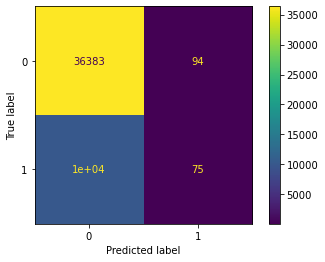

In [87]:
plot_confusion_matrix(logistic_model, x_test, y_test)
plt.show()

In [88]:
precision = precision_score(y_test, preds)
precision

0.4437869822485207

In [89]:
recall = recall_score(y_test, preds)
recall

0.0073862517234587356

In [90]:
f1 = f1_score(y_test, preds)
f1

0.014530659691950014

In [91]:
probs = logistic_model.predict_proba(x_test)
probs

array([[0.88647362, 0.11352638],
       [0.81832089, 0.18167911],
       [0.90967605, 0.09032395],
       ...,
       [0.85529655, 0.14470345],
       [0.71813653, 0.28186347],
       [0.74629616, 0.25370384]])

In [92]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [93]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

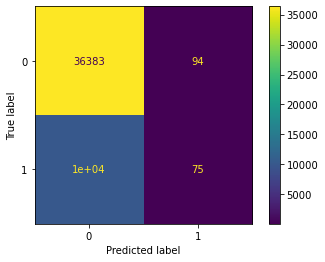



Accuracy:  0.7818404065964701
Precision:  0.4437869822485207
Recall:  0.0073862517234587356
F1:  0.014530659691950014
AUC:  0.6345776832432592


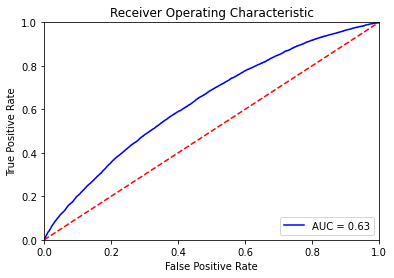

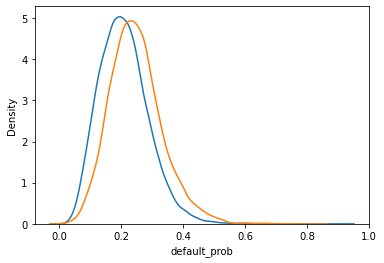

true_class  predicted_class
0           0                  0.997423
            1                  0.002577
1           0                  0.992614
            1                  0.007386
Name: predicted_class, dtype: float64


In [94]:
eval_model(logistic_model, x_test, y_test)

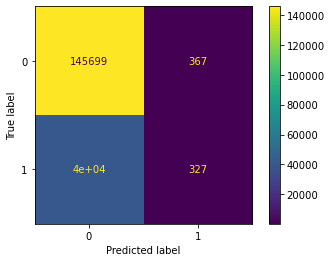



Accuracy:  0.7828846844625059
Precision:  0.4711815561959654
Recall:  0.008082655659094842
F1:  0.0158926879055187
AUC:  0.6378800030804251


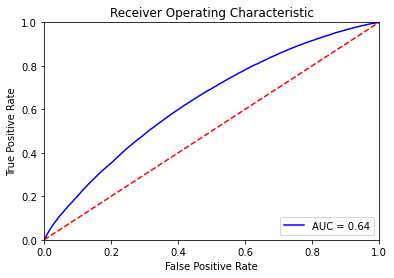

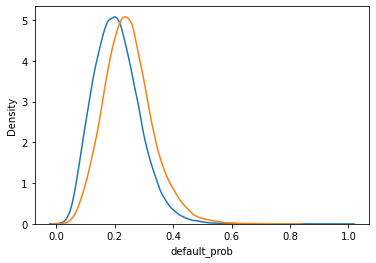

true_class  predicted_class
0           0                  0.997487
            1                  0.002513
1           0                  0.991917
            1                  0.008083
Name: predicted_class, dtype: float64


In [95]:
eval_model(logistic_model, x_train, y_train)

# Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

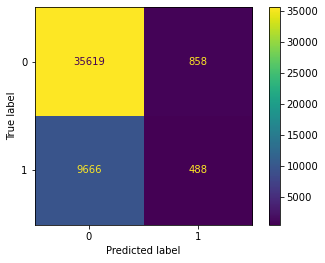



Accuracy:  0.7743132251077609
Precision:  0.362555720653789
Recall:  0.048059877880638174
F1:  0.0848695652173913
AUC:  0.6112023642010037


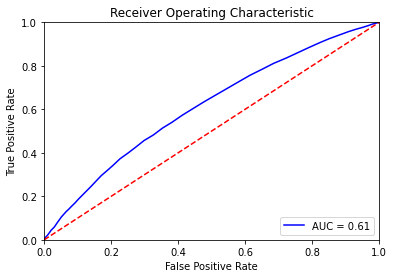

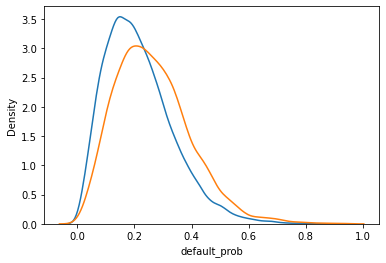

true_class  predicted_class
0           0                  0.976478
            1                  0.023522
1           0                  0.951940
            1                  0.048060
Name: predicted_class, dtype: float64


In [97]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

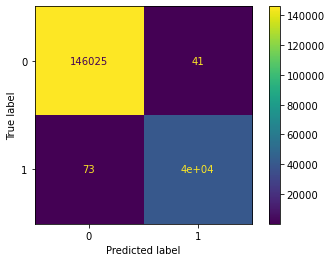



Accuracy:  0.9993888153203626
Precision:  0.9989857761286333
Recall:  0.998195615097511
F1:  0.9985905393041715
AUC:  0.9999803034733846


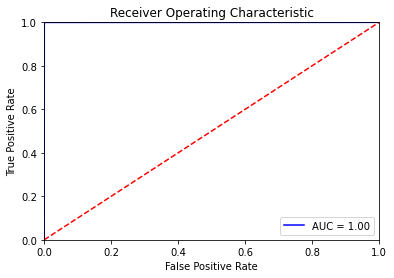

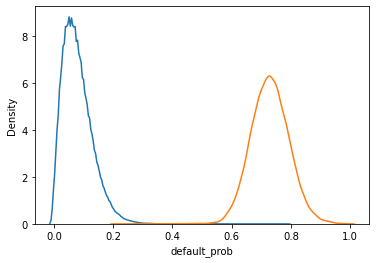

true_class  predicted_class
0           0                  0.999719
            1                  0.000281
1           1                  0.998196
            0                  0.001804
Name: predicted_class, dtype: float64


In [98]:
#Checking for overfitting

eval_model(rfc_model, x_train, y_train)

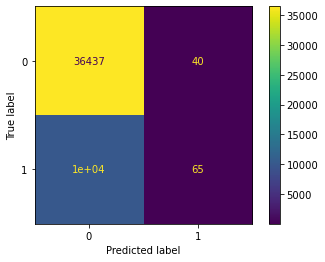



Accuracy:  0.7827839849027471
Precision:  0.6190476190476191
Recall:  0.006401418160330904
F1:  0.012671800370406472
AUC:  0.6432670379459771


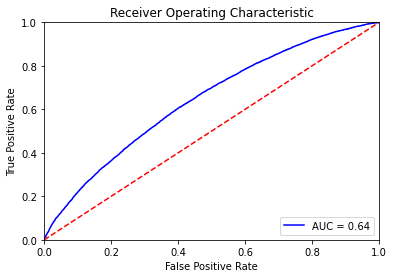

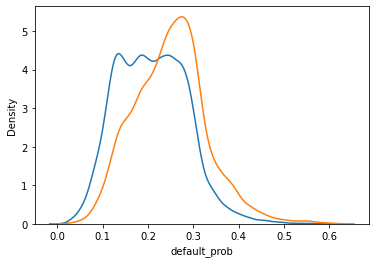

true_class  predicted_class
0           0                  0.998903
            1                  0.001097
1           0                  0.993599
            1                  0.006401
Name: predicted_class, dtype: float64


In [99]:
#Hyperparameter tunning

rfc_model = RandomForestClassifier(n_estimators=100, max_depth=15)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

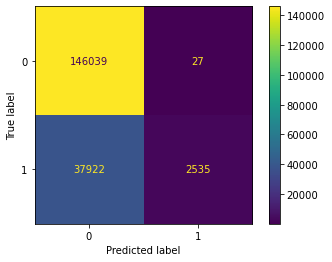



Accuracy:  0.796545198179313
Precision:  0.9894613583138173
Recall:  0.062659119559038
F1:  0.1178549013226714
AUC:  0.8386705036043265


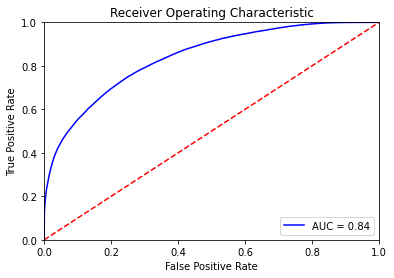

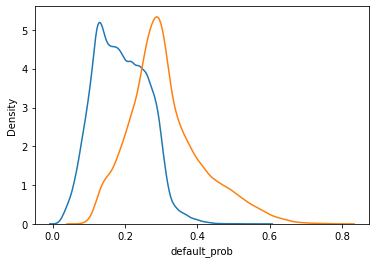

true_class  predicted_class
0           0                  0.999815
            1                  0.000185
1           0                  0.937341
            1                  0.062659
Name: predicted_class, dtype: float64


In [100]:
eval_model(rfc_model, x_train, y_train)

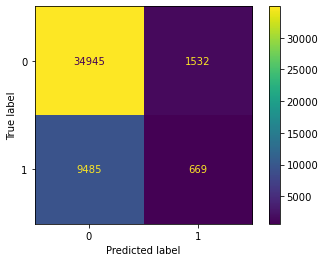



Accuracy:  0.763740859085158
Precision:  0.30395274875056794
Recall:  0.06588536537325192
F1:  0.10829623634156212
AUC:  0.5920475660382647


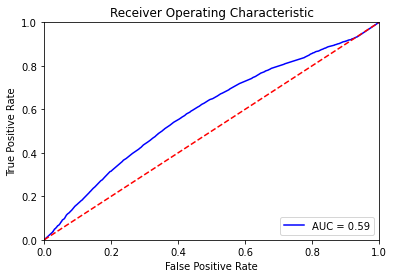

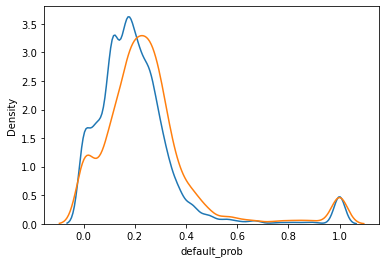

true_class  predicted_class
0           0                  0.958001
            1                  0.041999
1           0                  0.934115
            1                  0.065885
Name: predicted_class, dtype: float64


In [101]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(max_depth=15, random_state=42)
dc_model.fit(x_train, y_train)

eval_model(dc_model, x_test, y_test)

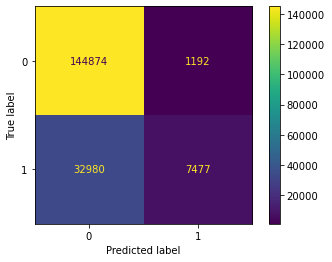



Accuracy:  0.8167947116441404
Precision:  0.8624985580805168
Recall:  0.18481350569740712
F1:  0.3044009282253797
AUC:  0.752283082105594


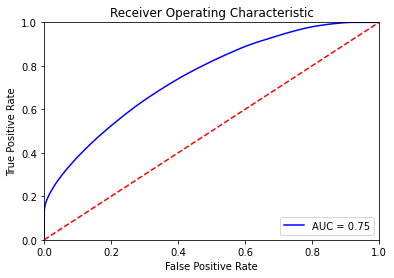

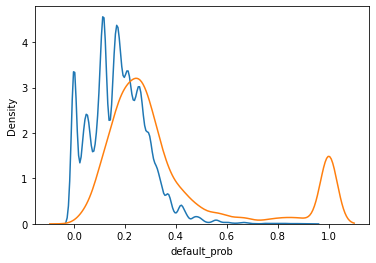

true_class  predicted_class
0           0                  0.991839
            1                  0.008161
1           0                  0.815186
            1                  0.184814
Name: predicted_class, dtype: float64


In [102]:
eval_model(dc_model, x_train, y_train)

In [103]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)
print(Counter(y_train_over))

Counter({0: 146066, 1: 146066})


In [104]:
print(x_train_over.shape)
print(y_train_over.shape)

(292132, 56)
(292132,)


In [105]:
import numpy as np
from sklearn.model_selection import train_test_split

#splitting training data into train and validation set
x_train_over, x_test, y_train_over,y_test = train_test_split(x_train_over, y_train_over, test_size = 0.2, random_state = 0)

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

modelRF = RandomForestClassifier()
modelRF.fit(x_train_over, y_train_over)

y_predRF = modelRF.predict(x_test)

print("Train Accuracy: ", modelRF.score(x_train_over, y_train_over))
print("Validation Accuracy: ", modelRF.score(x_test, y_test))

print("AUROC Score of Random Forest = ", roc_auc_score(y_test, y_predRF))

y_pred = logistic_model .predict(x_test)
print(classification_report(y_test, y_predRF))

Train Accuracy:  0.9996576881110802
Validation Accuracy:  0.8276995224810447
AUROC Score of Random Forest =  0.8276578175948495
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     29262
           1       0.84      0.80      0.82     29165

    accuracy                           0.83     58427
   macro avg       0.83      0.83      0.83     58427
weighted avg       0.83      0.83      0.83     58427



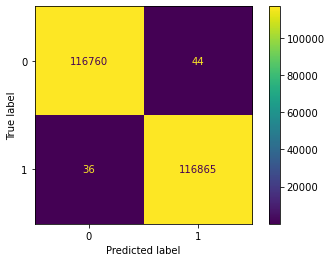



Accuracy:  0.9996576881110802
Precision:  0.9996236388986306
Recall:  0.9996920471167912
F1:  0.9996578418373894
AUC:  0.9999904776844217


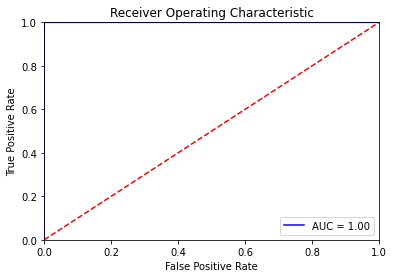

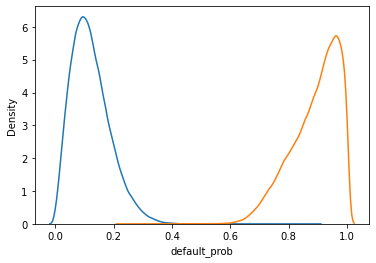

true_class  predicted_class
0           0                  0.999623
            1                  0.000377
1           1                  0.999692
            0                  0.000308
Name: predicted_class, dtype: float64


In [107]:
eval_model(modelRF, x_train_over, y_train_over)

In [108]:
from sklearn.tree import DecisionTreeClassifier

modelDC =DecisionTreeClassifier()
modelDC.fit(x_train_over, y_train_over)

y_predDC = modelDC.predict(x_test)

print("Train Accuracy: ", modelDC.score(x_train_over, y_train_over))
print("Validation Accuracy: ", modelDC.score(x_test, y_test))

print("AUROC Score of DecisionTree = ", roc_auc_score(y_test, y_predDC))
print(classification_report(y_test, y_predDC))

Train Accuracy:  0.9996576881110802
Validation Accuracy:  0.7469834152018758
AUROC Score of DecisionTree =  0.7470018978676107
              precision    recall  f1-score   support

           0       0.75      0.74      0.74     29262
           1       0.74      0.76      0.75     29165

    accuracy                           0.75     58427
   macro avg       0.75      0.75      0.75     58427
weighted avg       0.75      0.75      0.75     58427



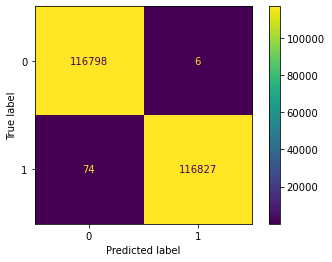



Accuracy:  0.9996576881110802
Precision:  0.9999486446466324
Recall:  0.9993669857400707
F1:  0.9996577305826281
AUC:  0.9999997606284414


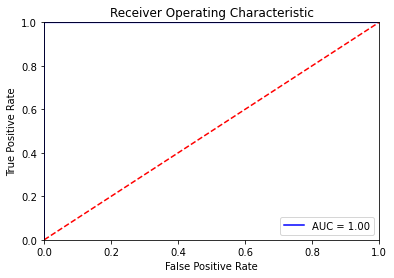

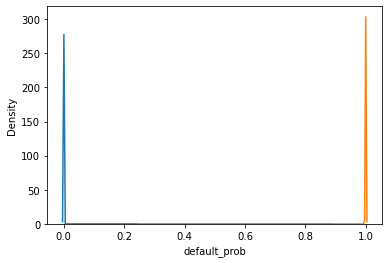

true_class  predicted_class
0           0                  0.999949
            1                  0.000051
1           1                  0.999367
            0                  0.000633
Name: predicted_class, dtype: float64


In [109]:
eval_model(modelDC, x_train_over, y_train_over)

In [110]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(x_train_over, y_train_over)

y_predLR = modelLR.predict(x_test)

print("Train Accuracy: ", modelLR.score(x_train_over, y_train_over))
print("Validation Accuracy: ", modelLR.score(x_test, y_test))

print("AUROC Score of LogisticRegression = ", roc_auc_score(y_test, y_predLR))
print(classification_report(y_test, y_predLR))

Train Accuracy:  0.6052288141032498
Validation Accuracy:  0.5985246546973146
AUROC Score of LogisticRegression =  0.5985794401936767
              precision    recall  f1-score   support

           0       0.61      0.57      0.59     29262
           1       0.59      0.63      0.61     29165

    accuracy                           0.60     58427
   macro avg       0.60      0.60      0.60     58427
weighted avg       0.60      0.60      0.60     58427



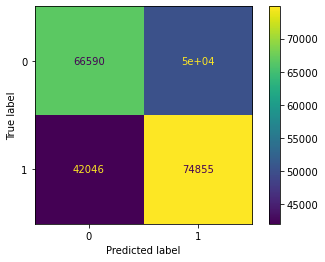



Accuracy:  0.6052288141032498
Precision:  0.5985096226882761
Recall:  0.6403281409055526
F1:  0.618713063602926
AUC:  0.6438230654438625


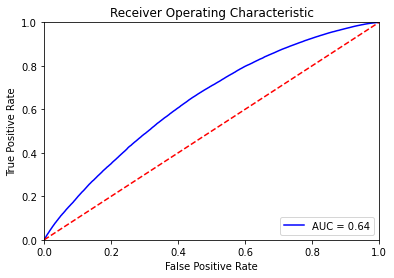

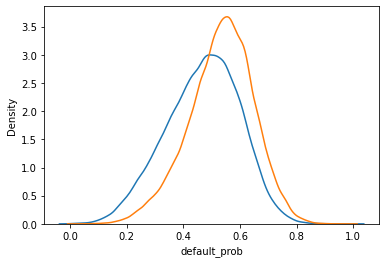

true_class  predicted_class
0           0                  0.570100
            1                  0.429900
1           1                  0.640328
            0                  0.359672
Name: predicted_class, dtype: float64


In [111]:
eval_model(modelLR, x_train_over, y_train_over)

In [112]:

# Train the random forest classifier on the training data
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Get feature importances as a numpy array
importances = clf.feature_importances_

# Convert numpy array to pandas dataframe
feature_importance_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# Plot feature importance
feature_importance_df.sort_values(by='importance', ascending=False).plot(x='feature', y='importance', kind='bar')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'